MNIST using cnn

In [77]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [78]:
# Importing mnist data
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

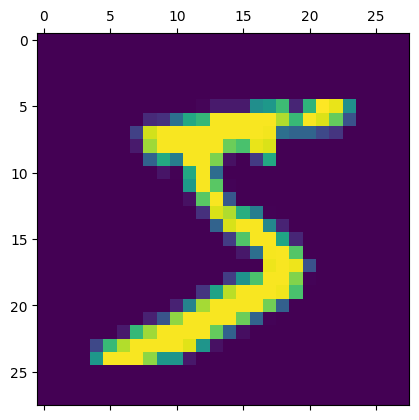

In [79]:
plt.matshow(X_train[0])

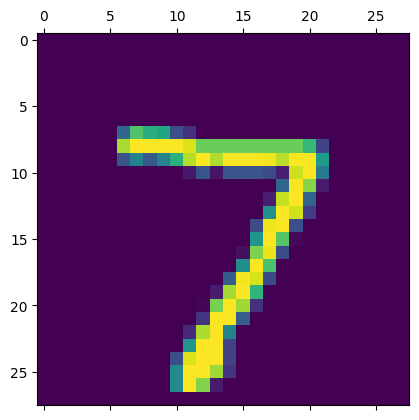

In [80]:
plt.matshow(X_test[0])


In [81]:
X_train, X_test = X_train/255, X_test/255

In [82]:
# Building model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), # last 1 is for color
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'), 
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

C:\Users\Harshan Attar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9049 - loss: 0.3068
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9857 - loss: 0.0455
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9902 - loss: 0.0291
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9938 - loss: 0.0197
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9951 - loss: 0.0161


In [83]:
loss,accuracy = model.evaluate(X_test, y_test)
print('Loss: ', loss, " Accuracy: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9904 - loss: 0.0311
Loss:  0.02628631889820099  Accuracy:  0.991599977016449


In [84]:
predicted = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [85]:
X_test.shape

(10000, 28, 28)

In [86]:
np.argmax(predicted[0])

7

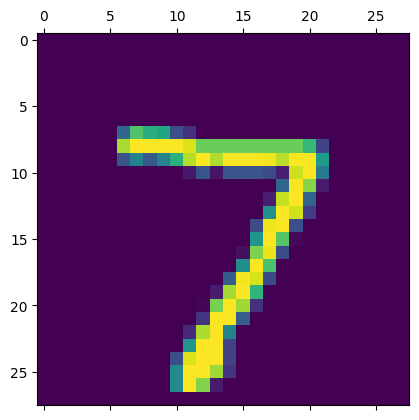

In [87]:
plt.matshow(X_test[0])

In [88]:
y_test[0]

7

In [89]:
# plt.matshow(X_test[0])
# print("Predicted: ", np.argmax(predicted[0]))
# test_image = X_test[0].reshape((1,28,28,1)) # first one is for batch size and last one is color 
# # test_image.shape
# test_predict = model.predict(test_image)
# np.argmax(test_predict)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


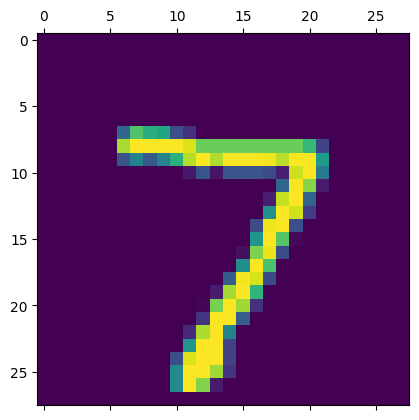

predicted:  7


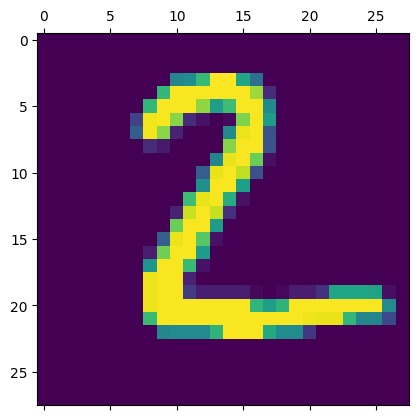

predicted:  2


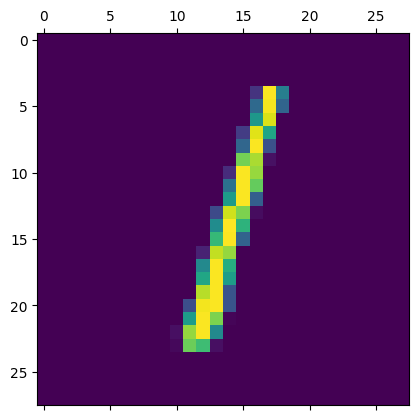

predicted:  1


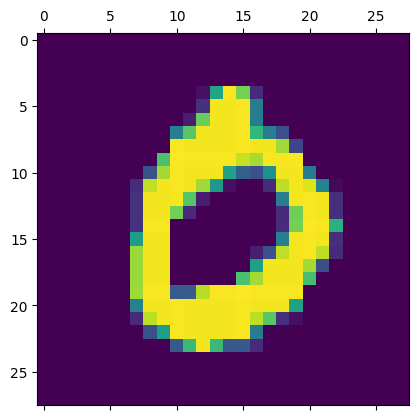

predicted:  0


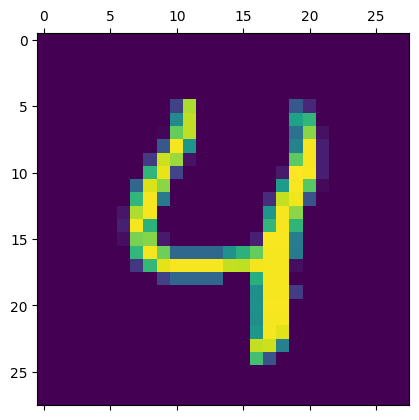

predicted:  4


In [90]:
predicted = model.predict(X_test)
for i in range(5):
    # plt.matshow(X_test[i])
    plt.matshow(X_test[i])
    plt.show()
    print('predicted: ', np.argmax(predicted[i]))
    

In [91]:
predicted_labels = [np.argmax(i) for i in predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    1,    2,    0,    0,    0,    3,    1,    3,    0],
       [   0, 1132,    0,    1,    1,    0,    0,    1,    0,    0],
       [   0,    0, 1025,    0,    1,    0,    0,    3,    3,    0],
       [   0,    1,    1, 1005,    0,    1,    0,    0,    2,    0],
       [   0,    0,    0,    0,  980,    0,    0,    0,    0,    2],
       [   0,    0,    0,   12,    0,  877,    1,    1,    1,    0],
       [   0,    2,    1,    0,    2,    2,  946,    0,    5,    0],
       [   0,    2,    2,    0,    0,    0,    0, 1020,    2,    2],
       [   1,    0,    1,    0,    0,    0,    0,    1,  970,    1],
       [   0,    0,    0,    1,    5,    5,    0,    1,    6,  991]])>

Text(95.72222222222221, 0.5, 'Truth')

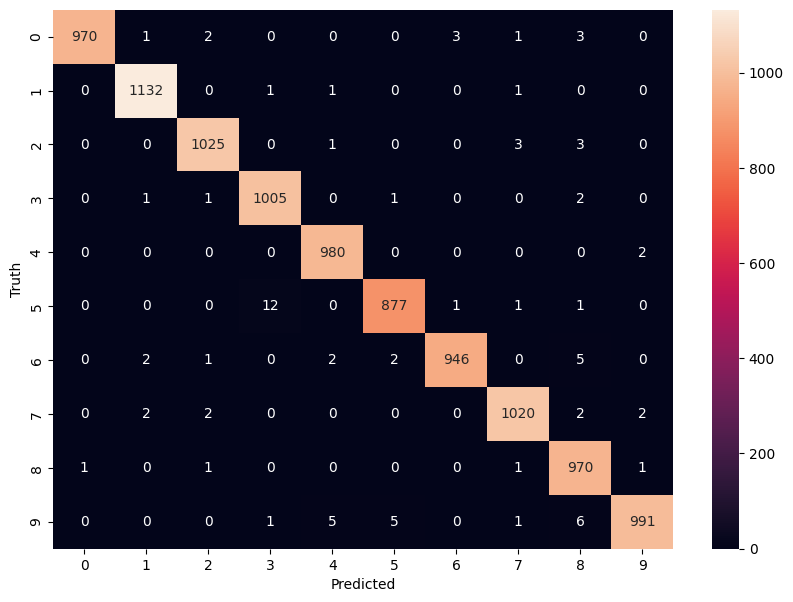

In [92]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')